<a href="https://colab.research.google.com/github/Adhini99/RETINAL-FUNDUS-SEGMENTATION/blob/main/Copy_of_Retina_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
andrewmvd_drive_digital_retinal_images_for_vessel_extraction_path = kagglehub.dataset_download('andrewmvd/drive-digital-retinal-images-for-vessel-extraction')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/34_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/40_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/22_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/27_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/28_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/26_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/38_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/39_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/24_training.tif
/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/tr

Contents of /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual: ['23_manual1.gif', '38_manual1.gif', '35_manual1.gif', '30_manual1.gif', '34_manual1.gif', '27_manual1.gif', '29_manual1.gif', '22_manual1.gif', '25_manual1.gif', '33_manual1.gif', '39_manual1.gif', '36_manual1.gif', '21_manual1.gif', '37_manual1.gif', '24_manual1.gif', '32_manual1.gif', '31_manual1.gif', '40_manual1.gif', '26_manual1.gif', '28_manual1.gif']
Processing image 1/5: 21_training.tif
Extracted 883 patches: 100 vessel, 783 non-vessel
Balanced dataset: 100 vessel, 80 partial background, 19 full background
Processing image 2/5: 22_training.tif
Extracted 894 patches: 117 vessel, 777 non-vessel
Balanced dataset: 117 vessel, 93 partial background, 23 full background
Processing image 3/5: 23_training.tif
Extracted 895 patches: 94 vessel, 801 non-vessel
Balanced dataset: 94 vessel, 75 partial background, 18 full background
Processing image 4/5: 24_training.tif
Extracted 893 patch

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 - 23s - 802ms/step - accuracy: 0.6300 - loss: 0.8204 - val_accuracy: 0.4957 - val_loss: 1.2754 - learning_rate: 2.0000e-04
Epoch 2/200
29/29 - 1s - 25ms/step - accuracy: 0.6893 - loss: 0.6691 - val_accuracy: 0.4957 - val_loss: 1.1813 - learning_rate: 2.0000e-04
Epoch 3/200
29/29 - 1s - 25ms/step - accuracy: 0.7044 - loss: 0.6225 - val_accuracy: 0.4957 - val_loss: 1.2431 - learning_rate: 2.0000e-04
Epoch 4/200
29/29 - 1s - 25ms/step - accuracy: 0.6936 - loss: 0.6638 - val_accuracy: 0.4957 - val_loss: 1.3878 - learning_rate: 2.0000e-04
Epoch 5/200
29/29 - 1s - 24ms/step - accuracy: 0.7346 - loss: 0.6261 - val_accuracy: 0.5000 - val_loss: 1.4867 - learning_rate: 2.0000e-04
Epoch 6/200
29/29 - 1s - 23ms/step - accuracy: 0.7292 - loss: 0.6048 - val_accuracy: 0.5000 - val_loss: 1.4246 - learning_rate: 2.0000e-04
Epoch 7/200
29/29 - 1s - 25ms/step - accuracy: 0.7055 - loss: 0.6053 - val_accuracy: 0.5216 - val_loss: 1.4103 - learning_rate: 2.0000e-04
Epoch 8/200
29/29 - 1s - 35ms/step - 

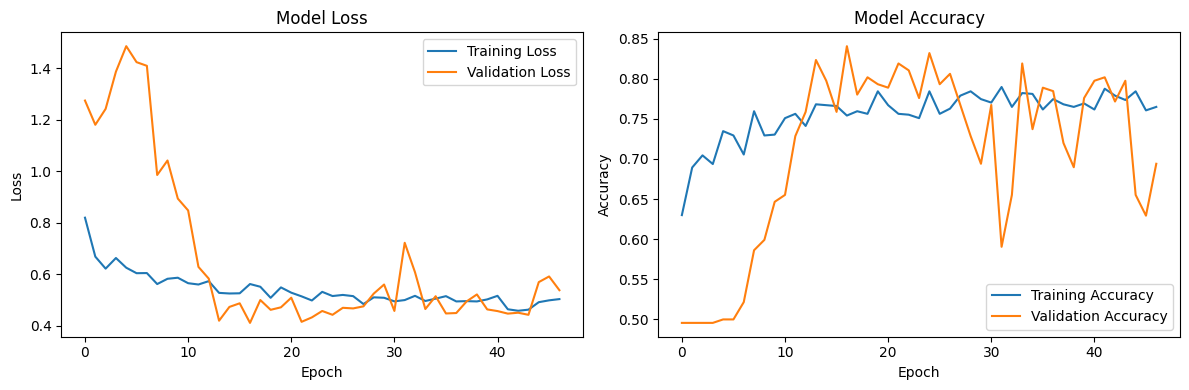

Directory /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/1st_manual does not exist!

Test manual annotations not found. Skipping test evaluation and visualization.


In [ ]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, jaccard_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from IPython.display import Image as IPyImage, display
import base64
from io import BytesIO

# Ensure matplotlib displays in notebook
%matplotlib inline

train_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images"
train_manual_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual"
train_mask_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/mask"
test_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/images"
test_manual_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/1st_manual"
test_mask_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/mask"
output_dir = "./" # Use current directory for output

def check_directory(path):
    if os.path.exists(path):
        print(f"Contents of {path}: {os.listdir(path)}")
    else:
        print(f"Directory {path} does not exist!")
    return os.path.exists(path)

def load_image(file_path):
    try:
        img = Image.open(file_path)
        if img.mode == "RGB":
            img = np.array(img)
            green_channel = img[:, :, 1]
            return green_channel
        return np.array(img)
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

def preprocess_image(image):
    if image is None:
        return None
    image_float = image.astype(np.float32)
    mean = np.mean(image_float)
    std = np.std(image_float) if np.std(image_float) != 0 else 1
    gcn_image = (image_float - mean) / std
    gcn_image = np.clip(gcn_image, -3, 3)
    gcn_image = ((gcn_image + 3) / 6 * 255).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(gcn_image)
    gamma = 1.2
    gamma_image = np.array(255 * (clahe_image / 255.0) ** (1.0 / gamma), dtype=np.uint8)
    return gamma_image

def extract_patches(image, mask, manual=None, patch_size=64, max_patches=5000):
    if image is None or mask is None or (manual is not None and manual is None):
        print("Invalid input image, mask, or manual. Returning empty patches.")
        return np.array([]), np.array([]) if manual is not None else None, []
    patches = []
    labels = []
    coords = []
    height, width = image.shape
    step = patch_size // 4
    pad_size = patch_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_mask = np.pad(mask, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_manual = np.pad(manual, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant') if manual is not None else None

    indices = []
    for i in range(pad_size, height + pad_size, step):
        for j in range(pad_size, width + pad_size, step):
            if padded_mask[i, j] == 0:
                continue
            indices.append((i, j))

    if len(indices) > max_patches:
        indices = np.random.choice(len(indices), max_patches, replace=False)
        indices = [indices[i] for i in indices]

    for i, j in indices:
        patch = padded_image[i - pad_size:i + pad_size, j - pad_size:j + pad_size]
        if patch.shape != (patch_size, patch_size):
            continue
        if manual is not None:
            label = padded_manual[i, j] // 255
            labels.append(label)
        patches.append(patch)
        coords.append((i - pad_size, j - pad_size))

    patches = np.array(patches)
    labels = np.array(labels) if manual is not None else None
    if manual is not None:
        print(f"Extracted {len(patches)} patches: {np.sum(labels == 1) if labels is not None else 0} vessel, {np.sum(labels == 0) if labels is not None else 0} non-vessel")
    else:
        print(f"Extracted {len(patches)} patches for prediction")
    return patches, labels, coords

def level_i_balancing(patches, labels, rho=0.8):
    if labels is None or len(labels) == 0 or len(patches) == 0:
        print("Warning: No valid patches or labels for balancing. Returning empty.")
        return patches, labels
    patch_means = np.mean(patches, axis=(1, 2)) / 255.0
    vessel_patches = patches[labels == 1]
    non_vessel_patches = patches[labels == 0]
    non_vessel_means = patch_means[labels == 0]
    num_vessel = len(vessel_patches)
    if num_vessel == 0:
        print("Warning: No vessel patches found, returning all patches")
        return patches, labels
    threshold = np.percentile(non_vessel_means, 75) if len(non_vessel_means) > 0 else 0.5
    partial_background = non_vessel_patches[non_vessel_means >= threshold]
    full_background = non_vessel_patches[non_vessel_means < threshold]
    num_partial_to_select = int(num_vessel * rho)
    num_full_to_select = int(num_vessel * (1 - rho))
    selected_partial = partial_background[np.random.choice(len(partial_background), min(num_partial_to_select, len(partial_background)), replace=False)] if len(partial_background) > 0 else np.array([])
    selected_full = full_background[np.random.choice(len(full_background), min(num_full_to_select, len(full_background)), replace=False)] if len(full_background) > 0 else np.array([])
    balanced_patches = np.concatenate([vessel_patches, selected_partial, selected_full], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else vessel_patches
    balanced_labels = np.concatenate([np.ones(len(vessel_patches)), np.zeros(len(selected_partial) + len(selected_full))], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else np.ones(len(vessel_patches))
    print(f"Balanced dataset: {len(vessel_patches)} vessel, {len(selected_partial)} partial background, {len(selected_full)} full background")
    return balanced_patches, balanced_labels

def build_model(input_shape=(64, 64, 1)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.35),
        Flatten(),
        Dense(512),
        BatchNormalization(),
        ReLU(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def postprocess_mask(pred_mask, original_mask):
    kernel = np.ones((5, 5), np.uint8)
    closed_mask = cv2.morphologyEx(pred_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    opened_mask = cv2.morphologyEx(closed_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    return (opened_mask * (original_mask / 255)).astype(np.uint8)

def predict_mask(model, image, mask, patch_size=64, threshold=0.4):
    if image is None or mask is None:
        print("Invalid image or mask for prediction.")
        return np.zeros((584, 565), dtype=np.uint8)  # DRIVE image size
    preprocessed_image = preprocess_image(image)
    if preprocessed_image is None:
        print("Preprocessing failed.")
        return np.zeros((584, 565), dtype=np.uint8)
    preprocessed_image = preprocessed_image * (mask / 255)
    patches, _, coords = extract_patches(preprocessed_image, mask, manual=None, patch_size=patch_size)
    if len(patches) == 0:
        print("No patches extracted for prediction.")
        return np.zeros_like(image, dtype=np.uint8)
    patches = patches.reshape(-1, patch_size, patch_size, 1)
    pred_probabilities = model.predict(patches, verbose=0).flatten()
    pred_binary = (pred_probabilities > threshold).astype(np.uint8)
    height, width = image.shape
    pred_mask_accumulator = np.zeros((height, width), dtype=np.float32)
    patch_count_accumulator = np.zeros((height, width), dtype=np.float32)
    for idx, (top, left) in enumerate(coords):
        top_end = min(top + patch_size, height)
        left_end = min(left + patch_size, width)
        patch_height = top_end - top
        patch_width = left_end - left
        pred_mask_accumulator[top:top_end, left:left_end] += pred_binary[idx] * np.ones((patch_height, patch_width), dtype=np.float32)
        patch_count_accumulator[top:top_end, left:left_end] += 1
    epsilon = 1e-6
    pred_mask_averaged = np.where(patch_count_accumulator > 0, pred_mask_accumulator / (patch_count_accumulator + epsilon), 0)
    final_pred_mask = (pred_mask_averaged * 255).astype(np.uint8)
    final_pred_mask = final_pred_mask * (mask // 255)
    print(f"Processed {len(patches)} patches for prediction, Predicted mask: {np.sum(final_pred_mask > 0)} vessel pixels")
    return postprocess_mask(final_pred_mask, mask)

def evaluate_model(model, val_patches, val_labels):
    if val_patches is None or val_labels is None or len(val_patches) == 0:
        print("No validation data available for evaluation.")
        return None, None, None, None, None, None, None
    predictions = model.predict(val_patches, verbose=0).flatten()
    thresholds = np.linspace(0.3, 0.7, 9)
    best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou = 0, 0, 0, 0, 0, 0
    best_threshold = 0.5
    print("\n--- Evaluation Metrics per Threshold ---")
    for threshold in thresholds:
        pred_binary = (predictions > threshold).astype(np.uint8)
        acc = accuracy_score(val_labels, pred_binary)
        auc = roc_auc_score(val_labels, pred_binary)
        tn, fp, fn, tp = confusion_matrix(val_labels, pred_binary, labels=[0, 1]).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(val_labels, pred_binary)
        iou = jaccard_score(val_labels, pred_binary)
        print(f"Threshold {threshold:.2f}: Acc: {acc:.4f}, AUC: {auc:.4f}, Sens: {sensitivity:.4f}, Spec: {specificity:.4f}, F1: {f1:.4f}, IoU: {iou:.4f}")
        current_metric = (auc + f1) / 2
        if current_metric > (best_auc + best_f1) / 2:
            best_acc, best_auc, best_sensitivity, best_specificity = acc, auc, sensitivity, specificity
            best_f1, best_iou = f1, iou
            best_threshold = threshold
    print(f"\nOptimal Threshold: {best_threshold:.2f}")
    print(f"Prediction distribution at optimal threshold: {np.sum(predictions > best_threshold)} vessel, {np.sum(predictions <= best_threshold)} non-vessel")
    return best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou, best_threshold

def load_dataset(images_path, manual_path, mask_path, max_images=5):
    if not check_directory(manual_path):
        print("Manual path not found. Exiting.")
        return None, None
    all_patches = []
    all_labels = []
    image_files = sorted(glob.glob(os.path.join(images_path, "*.tif")))[:max_images]
    manual_files = sorted(glob.glob(os.path.join(manual_path, "*.gif")))[:max_images]
    mask_files = sorted(glob.glob(os.path.join(mask_path, "*.gif")))[:max_images]
    for idx, (img_file, manual_file, mask_file) in enumerate(zip(image_files, manual_files, mask_files)):
        print(f"Processing image {idx + 1}/{len(image_files)}: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if image is None or mask is None or manual is None:
            print(f"Skipping image {img_file} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping image {img_file} due to preprocessing error.")
            continue
        preprocessed_image = preprocessed_image * (mask / 255)
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual)
        if len(patches) == 0 or labels is None or len(labels) == 0:
            print(f"No valid patches extracted for image {img_file}. Skipping.")
            continue
        balanced_patches, balanced_labels = level_i_balancing(patches, labels)
        all_patches.append(balanced_patches)
        all_labels.append(balanced_labels)
    if not all_patches:
        print("No patches loaded from any image.")
        return np.array([]), np.array([])
    all_patches = np.concatenate(all_patches, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    all_patches = all_patches.reshape(-1, 64, 64, 1)
    print(f"Total dataset: {len(all_patches)} patches, {np.sum(all_labels == 1)} vessel, {np.sum(all_labels == 0)} non-vessel")
    return all_patches, all_labels

train_patches, train_labels = load_dataset(train_images_path, train_manual_path, train_mask_path)
if train_patches is None or len(train_patches) == 0:
    print("Training data could not be loaded or is empty. Exiting.")
    exit()

train_patches, val_patches, train_labels, val_labels = train_test_split(
    train_patches, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

model = build_model()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)

history = model.fit(
    datagen.flow(train_patches, train_labels, batch_size=32),
    epochs=200,
    validation_data=(val_patches, val_labels),
    class_weight=class_weight_dict,
    callbacks=[reduce_lr, early_stopping],
    verbose=2
)

acc, auc, sensitivity, specificity, f1, iou, best_threshold = evaluate_model(model, val_patches, val_labels)
if acc is not None:
    print(f"\nFinal Validation Metrics (Optimal Threshold: {best_threshold:.2f}):")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, F1-Score: {f1:.4f}, IoU: {iou:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'history_plots.png'))
plt.show()

if not check_directory(test_manual_path):
    print("\nTest manual annotations not found. Skipping test evaluation and visualization.")
else:
    test_images = sorted(glob.glob(os.path.join(test_images_path, "*.tif")))[:5]
    test_masks = sorted(glob.glob(os.path.join(test_mask_path, "*.gif")))[:5]
    test_manuals = sorted(glob.glob(os.path.join(test_manual_path, "*.gif")))[:5]
    print("\nTest image files:", [os.path.basename(f) for f in test_images])
    print("Test mask files:", [os.path.basename(f) for f in test_masks])
    print("Test manual files:", [os.path.basename(f) for f in test_manuals])

    test_pred = []
    test_ground_truths = []
    for i, (img_file, mask_file, manual_file) in enumerate(zip(test_images, test_masks, test_manuals)):
        print(f"\nGenerating predicted mask for test image {i + 1}/5: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if manual is not None:
            print(f"Ground truth vessel pixels for {os.path.basename(manual_file)}: {np.sum(manual > 0)}")
        else:
            print(f"Failed to load manual {manual_file}. Skipping.")
            continue
        pred_mask = predict_mask(model, image, mask, threshold=best_threshold)
        test_pred.append(pred_mask)
        test_ground_truths.append(manual)

    if not test_pred:
        print("No predictions generated. Exiting.")
        exit()

    test_labels_list = []
    for img, mask, manual in zip(test_images, test_masks, test_manuals):
        img_basename = os.path.basename(img)
        image = load_image(img)
        mask = load_image(mask)
        manual = load_image(manual)
        if image is None or mask is None or manual is None:
            print(f"Skipping {img_basename} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping {img_basename} due to preprocessing error.")
            continue
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual)
        if labels is not None and len(labels) > 0:
            test_labels_list.append(labels)
        else:
            print(f"No valid labels extracted for {img_basename}. Skipping.")

    if not test_labels_list:
        print("No valid test labels extracted. Skipping evaluation.")
    else:
        test_patches_flat = np.concatenate([extract_patches(preprocess_image(load_image(img)), load_image(mask))[0] for img, mask in zip(test_images, test_masks)], axis=0)
        test_labels_flat = np.concatenate(test_labels_list, axis=0)
        test_pred_flat = model.predict(test_patches_flat.reshape(-1, 64, 64, 1), verbose=0)
        test_pred_flat = (test_pred_flat > best_threshold).astype(np.uint8).flatten()

        cm = confusion_matrix(test_labels_flat, test_pred_flat)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vessel', 'Vessel'], yticklabels=['Non-Vessel', 'Vessel'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
        plt.show()
        print(classification_report(test_labels_flat, test_pred_flat, target_names=['Non-Vessel', 'Vessel']))

    plt.figure(figsize=(15, 25))
    for i, (img, gt, pred) in enumerate(zip([load_image(f) for f in test_images], test_ground_truths, test_pred)):
        plt.subplot(5, 3, i * 3 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Original Image {i+1}')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 2)
        plt.imshow(gt, cmap='gray')
        plt.title(f'Ground Truth {i+1}')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 3)
        plt.imshow(pred, cmap='gray')
        plt.title(f'Predicted Mask {i+1} ({np.sum(pred > 0)} vessel pixels)')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'predictions.png'))
    plt.show()

    print("\nListing output directory contents:")
    print(os.listdir(output_dir))

    print("\nDisplaying predictions.png:")
    try:
        display(IPyImage(filename=os.path.join(output_dir, 'predictions.png')))
    except Exception as e:
        print(f"Error displaying predictions.png: {e}")
        print("Please check /kaggle/working/predictions.png manually.")

    np.save(os.path.join(output_dir, 'test_predictions.npy'), test_pred)

Checking directories:
Contents of /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images: ['34_training.tif', '40_training.tif', '22_training.tif', '27_training.tif', '28_training.tif', '26_training.tif', '38_training.tif', '39_training.tif', '24_training.tif', '33_training.tif', '36_training.tif', '32_training.tif', '25_training.tif', '37_training.tif', '29_training.tif', '23_training.tif', '30_training.tif', '35_training.tif', '31_training.tif', '21_training.tif']
Contents of /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual: ['23_manual1.gif', '38_manual1.gif', '35_manual1.gif', '30_manual1.gif', '34_manual1.gif', '27_manual1.gif', '29_manual1.gif', '22_manual1.gif', '25_manual1.gif', '33_manual1.gif', '39_manual1.gif', '36_manual1.gif', '21_manual1.gif', '37_manual1.gif', '24_manual1.gif', '32_manual1.gif', '31_manual1.gif', '40_manual1.gif', '26_manual1.gif', '28_manual1.gif']
Contents of /kaggle/input/drive-

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 - 23s - 804ms/step - accuracy: 0.5912 - loss: 0.8138 - val_accuracy: 0.4784 - val_loss: 0.7426 - learning_rate: 2.0000e-04
Epoch 2/200
29/29 - 1s - 26ms/step - accuracy: 0.6710 - loss: 0.6917 - val_accuracy: 0.5043 - val_loss: 0.7851 - learning_rate: 2.0000e-04
Epoch 3/200
29/29 - 1s - 24ms/step - accuracy: 0.6764 - loss: 0.6846 - val_accuracy: 0.5129 - val_loss: 0.7530 - learning_rate: 2.0000e-04
Epoch 4/200
29/29 - 1s - 45ms/step - accuracy: 0.6990 - loss: 0.6728 - val_accuracy: 0.4698 - val_loss: 0.8664 - learning_rate: 2.0000e-04
Epoch 5/200
29/29 - 1s - 24ms/step - accuracy: 0.7055 - loss: 0.6360 - val_accuracy: 0.5043 - val_loss: 1.2682 - learning_rate: 2.0000e-04
Epoch 6/200
29/29 - 1s - 27ms/step - accuracy: 0.7206 - loss: 0.5995 - val_accuracy: 0.5302 - val_loss: 1.0777 - learning_rate: 2.0000e-04
Epoch 7/200
29/29 - 1s - 26ms/step - accuracy: 0.7228 - loss: 0.6013 - val_accuracy: 0.5733 - val_loss: 1.0077 - learning_rate: 2.0000e-04
Epoch 8/200
29/29 - 1s - 26ms/step - 

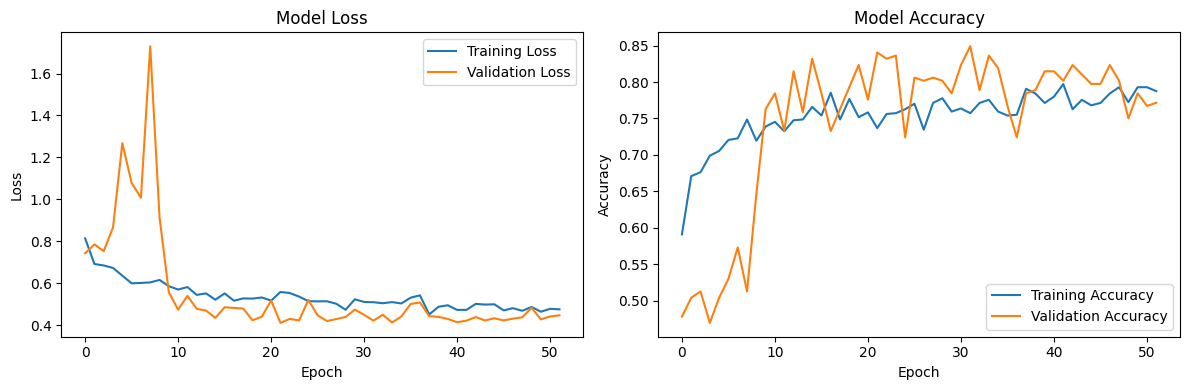

Directory /kaggle/input/drive-digital-retinal-images-for_vessel-extraction/DRIVE/test/1st_manual does not exist!

Test manual annotations not found. Skipping test evaluation and visualization.


In [ ]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, jaccard_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from IPython.display import Image as IPyImage, display
import base64
from io import BytesIO

# Ensure matplotlib displays in notebook
%matplotlib inline

train_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images"
train_manual_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual"
train_mask_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/mask"
test_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/images"
test_manual_path = "/kaggle/input/drive-digital-retinal-images-for_vessel-extraction/DRIVE/test/1st_manual"
test_mask_path = "/kaggle/input/drive-digital-retinal-images-for_vessel-extraction/DRIVE/test/mask"
output_dir = "./" # Use current directory for output

def check_directory(path):
    if os.path.exists(path):
        print(f"Contents of {path}: {os.listdir(path)}")
    else:
        print(f"Directory {path} does not exist!")
    return os.path.exists(path)

print("Checking directories:")
check_directory(train_images_path)
check_directory(train_manual_path)
check_directory(train_mask_path)
check_directory(test_images_path)
check_directory(test_manual_path)
check_directory(test_mask_path)

def load_image(file_path):
    try:
        img = Image.open(file_path)
        if img.mode == "RGB":
            img = np.array(img)
            green_channel = img[:, :, 1]
            return green_channel
        return np.array(img)
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

def preprocess_image(image):
    if image is None:
        return None
    image_float = image.astype(np.float32)
    mean = np.mean(image_float)
    std = np.std(image_float) if np.std(image_float) != 0 else 1
    gcn_image = (image_float - mean) / std
    gcn_image = np.clip(gcn_image, -3, 3)
    gcn_image = ((gcn_image + 3) / 6 * 255).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(gcn_image)
    gamma = 1.2
    gamma_image = np.array(255 * (clahe_image / 255.0) ** (1.0 / gamma), dtype=np.uint8)
    return gamma_image

def extract_patches(image, mask, manual=None, patch_size=64, max_patches=5000):
    if image is None or mask is None or (manual is not None and manual is None):
        print("Invalid input image, mask, or manual. Returning empty patches.")
        return np.array([]), np.array([]) if manual is not None else None, []
    patches = []
    labels = []
    coords = []
    height, width = image.shape
    step = patch_size // 4
    pad_size = patch_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_mask = np.pad(mask, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_manual = np.pad(manual, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant') if manual is not None else None

    indices = []
    for i in range(pad_size, height + pad_size, step):
        for j in range(pad_size, width + pad_size, step):
            if padded_mask[i, j] == 0:
                continue
            indices.append((i, j))

    if len(indices) > max_patches:
        indices = np.random.choice(len(indices), max_patches, replace=False)
        indices = [indices[i] for i in indices]

    for i, j in indices:
        patch = padded_image[i - pad_size:i + pad_size, j - pad_size:j + pad_size]
        if patch.shape != (patch_size, patch_size):
            continue
        if manual is not None:
            label = padded_manual[i, j] // 255
            labels.append(label)
        patches.append(patch)
        coords.append((i - pad_size, j - pad_size))

    patches = np.array(patches)
    labels = np.array(labels) if manual is not None else None
    if manual is not None:
        print(f"Extracted {len(patches)} patches: {np.sum(labels == 1) if labels is not None else 0} vessel, {np.sum(labels == 0) if labels is not None else 0} non-vessel")
    else:
        print(f"Extracted {len(patches)} patches for prediction")
    return patches, labels, coords

def level_i_balancing(patches, labels, rho=0.8):
    if labels is None or len(labels) == 0 or len(patches) == 0:
        print("Warning: No valid patches or labels for balancing. Returning empty.")
        return patches, labels
    patch_means = np.mean(patches, axis=(1, 2)) / 255.0
    vessel_patches = patches[labels == 1]
    non_vessel_patches = patches[labels == 0]
    non_vessel_means = patch_means[labels == 0]
    num_vessel = len(vessel_patches)
    if num_vessel == 0:
        print("Warning: No vessel patches found, returning all patches")
        return patches, labels
    threshold = np.percentile(non_vessel_means, 75) if len(non_vessel_means) > 0 else 0.5
    partial_background = non_vessel_patches[non_vessel_means >= threshold]
    full_background = non_vessel_patches[non_vessel_means < threshold]
    num_partial_to_select = int(num_vessel * rho)
    num_full_to_select = int(num_vessel * (1 - rho))
    selected_partial = partial_background[np.random.choice(len(partial_background), min(num_partial_to_select, len(partial_background)), replace=False)] if len(partial_background) > 0 else np.array([])
    selected_full = full_background[np.random.choice(len(full_background), min(num_full_to_select, len(full_background)), replace=False)] if len(full_background) > 0 else np.array([])
    balanced_patches = np.concatenate([vessel_patches, selected_partial, selected_full], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else vessel_patches
    balanced_labels = np.concatenate([np.ones(len(vessel_patches)), np.zeros(len(selected_partial) + len(selected_full))], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else np.ones(len(vessel_patches))
    print(f"Balanced dataset: {len(vessel_patches)} vessel, {len(selected_partial)} partial background, {len(selected_full)} full background")
    return balanced_patches, balanced_labels

def build_model(input_shape=(64, 64, 1)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.35),
        Flatten(),
        Dense(512),
        BatchNormalization(),
        ReLU(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def postprocess_mask(pred_mask, original_mask):
    kernel = np.ones((5, 5), np.uint8)
    closed_mask = cv2.morphologyEx(pred_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    opened_mask = cv2.morphologyEx(closed_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    return (opened_mask * (original_mask / 255)).astype(np.uint8)

def predict_mask(model, image, mask, patch_size=64, threshold=0.4):
    if image is None or mask is None:
        print("Invalid image or mask for prediction.")
        return np.zeros((584, 565), dtype=np.uint8)  # DRIVE image size
    preprocessed_image = preprocess_image(image)
    if preprocessed_image is None:
        print("Preprocessing failed.")
        return np.zeros((584, 565), dtype=np.uint8)
    preprocessed_image = preprocessed_image * (mask / 255)
    patches, _, coords = extract_patches(preprocessed_image, mask, manual=None, patch_size=patch_size)
    if len(patches) == 0:
        print("No patches extracted for prediction.")
        return np.zeros_like(image, dtype=np.uint8)
    patches = patches.reshape(-1, patch_size, patch_size, 1)
    pred_probabilities = model.predict(patches, verbose=0).flatten()
    pred_binary = (pred_probabilities > threshold).astype(np.uint8)
    height, width = image.shape
    pred_mask_accumulator = np.zeros((height, width), dtype=np.float32)
    patch_count_accumulator = np.zeros((height, width), dtype=np.float32)
    for idx, (top, left) in enumerate(coords):
        top_end = min(top + patch_size, height)
        left_end = min(left + patch_size, width)
        patch_height = top_end - top
        patch_width = left_end - left
        pred_mask_accumulator[top:top_end, left:left_end] += pred_binary[idx] * np.ones((patch_height, patch_width), dtype=np.float32)
        patch_count_accumulator[top:top_end, left:left_end] += 1
    epsilon = 1e-6
    pred_mask_averaged = np.where(patch_count_accumulator > 0, pred_mask_accumulator / (patch_count_accumulator + epsilon), 0)
    final_pred_mask = (pred_mask_averaged * 255).astype(np.uint8)
    final_pred_mask = final_pred_mask * (mask // 255)
    print(f"Processed {len(patches)} patches for prediction, Predicted mask: {np.sum(final_pred_mask > 0)} vessel pixels")
    return postprocess_mask(final_pred_mask, mask)

def evaluate_model(model, val_patches, val_labels):
    if val_patches is None or val_labels is None or len(val_patches) == 0:
        print("No validation data available for evaluation.")
        return None, None, None, None, None, None, None
    predictions = model.predict(val_patches, verbose=0).flatten()
    thresholds = np.linspace(0.3, 0.7, 9)
    best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou = 0, 0, 0, 0, 0, 0
    best_threshold = 0.5
    print("\n--- Evaluation Metrics per Threshold ---")
    for threshold in thresholds:
        pred_binary = (predictions > threshold).astype(np.uint8)
        acc = accuracy_score(val_labels, pred_binary)
        auc = roc_auc_score(val_labels, pred_binary)
        tn, fp, fn, tp = confusion_matrix(val_labels, pred_binary, labels=[0, 1]).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(val_labels, pred_binary)
        iou = jaccard_score(val_labels, pred_binary)
        print(f"Threshold {threshold:.2f}: Acc: {acc:.4f}, AUC: {auc:.4f}, Sens: {sensitivity:.4f}, Spec: {specificity:.4f}, F1: {f1:.4f}, IoU: {iou:.4f}")
        current_metric = (auc + f1) / 2
        if current_metric > (best_auc + best_f1) / 2:
            best_acc, best_auc, best_sensitivity, best_specificity = acc, auc, sensitivity, specificity
            best_f1, best_iou = f1, iou
            best_threshold = threshold
    print(f"\nOptimal Threshold: {best_threshold:.2f}")
    print(f"Prediction distribution at optimal threshold: {np.sum(predictions > best_threshold)} vessel, {np.sum(predictions <= best_threshold)} non-vessel")
    return best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou, best_threshold

def load_dataset(images_path, manual_path, mask_path, max_images=5):
    if not check_directory(manual_path):
        print("Manual path not found. Exiting.")
        return None, None
    all_patches = []
    all_labels = []
    image_files = sorted(glob.glob(os.path.join(images_path, "*.tif")))[:max_images]
    manual_files = sorted(glob.glob(os.path.join(manual_path, "*.gif")))[:max_images]
    mask_files = sorted(glob.glob(os.path.join(mask_path, "*.gif")))[:max_images]
    for idx, (img_file, manual_file, mask_file) in enumerate(zip(image_files, manual_files, mask_files)):
        print(f"Processing image {idx + 1}/{len(image_files)}: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if image is None or mask is None or manual is None:
            print(f"Skipping image {img_file} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping image {img_file} due to preprocessing error.")
            continue
        preprocessed_image = preprocessed_image * (mask / 255)
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual)
        if len(patches) == 0 or labels is None or len(labels) == 0:
            print(f"No valid patches extracted for image {img_file}. Skipping.")
            continue
        balanced_patches, balanced_labels = level_i_balancing(patches, labels)
        all_patches.append(balanced_patches)
        all_labels.append(balanced_labels)
    if not all_patches:
        print("No patches loaded from any image.")
        return np.array([]), np.array([])
    all_patches = np.concatenate(all_patches, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    all_patches = all_patches.reshape(-1, 64, 64, 1)
    print(f"Total dataset: {len(all_patches)} patches, {np.sum(all_labels == 1)} vessel, {np.sum(all_labels == 0)} non-vessel")
    return all_patches, all_labels

train_patches, train_labels = load_dataset(train_images_path, train_manual_path, train_mask_path)
if train_patches is None or len(train_patches) == 0:
    print("Training data could not be loaded or is empty. Exiting.")
    exit()

train_patches, val_patches, train_labels, val_labels = train_test_split(
    train_patches, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

model = build_model()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)

history = model.fit(
    datagen.flow(train_patches, train_labels, batch_size=32),
    epochs=200,
    validation_data=(val_patches, val_labels),
    class_weight=class_weight_dict,
    callbacks=[reduce_lr, early_stopping],
    verbose=2
)

acc, auc, sensitivity, specificity, f1, iou, best_threshold = evaluate_model(model, val_patches, val_labels)
if acc is not None:
    print(f"\nFinal Validation Metrics (Optimal Threshold: {best_threshold:.2f}):")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, F1-Score: {f1:.4f}, IoU: {iou:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'history_plots.png'))
plt.show()

if not check_directory(test_manual_path):
    print("\nTest manual annotations not found. Skipping test evaluation and visualization.")
else:
    test_images = sorted(glob.glob(os.path.join(test_images_path, "*.tif")))[:5]
    test_masks = sorted(glob.glob(os.path.join(test_mask_path, "*.gif")))[:5]
    test_manuals = sorted(glob.glob(os.path.join(test_manual_path, "*.gif")))[:5]
    print("\nTest image files:", [os.path.basename(f) for f in test_images])
    print("Test mask files:", [os.path.basename(f) for f in test_masks])
    print("Test manual files:", [os.path.basename(f) for f in test_manuals])

    test_pred = []
    test_ground_truths = []
    for i, (img_file, mask_file, manual_file) in enumerate(zip(test_images, test_masks, test_manuals)):
        print(f"\nGenerating predicted mask for test image {i + 1}/5: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if manual is not None:
            print(f"Ground truth vessel pixels for {os.path.basename(manual_file)}: {np.sum(manual > 0)}")
        else:
            print(f"Failed to load manual {manual_file}. Skipping.")
            continue
        pred_mask = predict_mask(model, image, mask, threshold=best_threshold)
        test_pred.append(pred_mask)
        test_ground_truths.append(manual)

    if not test_pred:
        print("No predictions generated. Exiting.")
        exit()

    test_labels_list = []
    for img, mask, manual in zip(test_images, test_masks, test_manuals):
        img_basename = os.path.basename(img)
        image = load_image(img)
        mask = load_image(mask)
        manual = load_image(manual)
        if image is None or mask is None or manual is None:
            print(f"Skipping {img_basename} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping {img_basename} due to preprocessing error.")
            continue
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual)
        if labels is not None and len(labels) > 0:
            test_labels_list.append(labels)
        else:
            print(f"No valid labels extracted for {img_basename}. Skipping.")

    if not test_labels_list:
        print("No valid test labels extracted. Skipping evaluation.")
    else:
        test_patches_flat = np.concatenate([extract_patches(preprocess_image(load_image(img)), load_image(mask))[0] for img, mask in zip(test_images, test_masks)], axis=0)
        test_labels_flat = np.concatenate(test_labels_list, axis=0)
        test_pred_flat = model.predict(test_patches_flat.reshape(-1, 64, 64, 1), verbose=0)
        test_pred_flat = (test_pred_flat > best_threshold).astype(np.uint8).flatten()

        cm = confusion_matrix(test_labels_flat, test_pred_flat)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vessel', 'Vessel'], yticklabels=['Non-Vessel', 'Vessel'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
        plt.show()
        print(classification_report(test_labels_flat, test_pred_flat, target_names=['Non-Vessel', 'Vessel']))

    plt.figure(figsize=(15, 25))
    for i, (img, gt, pred) in enumerate(zip([load_image(f) for f in test_images], test_ground_truths, test_pred)):
        plt.subplot(5, 3, i * 3 + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Original Image {i+1}')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 2)
        plt.imshow(gt, cmap='gray')
        plt.title(f'Ground Truth {i+1}')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 3)
        plt.imshow(pred, cmap='gray')
        plt.title(f'Predicted Mask {i+1} ({np.sum(pred > 0)} vessel pixels)')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'predictions.png'))
    plt.show()

    print("\nListing output directory contents:")
    print(os.listdir(output_dir))

    print("\nChecking predictions.png:")
    if os.path.exists(os.path.join(output_dir, 'predictions.png')):
        file_size = os.path.getsize(os.path.join(output_dir, 'predictions.png')) / 1024  # KB
        print(f"predictions.png exists, size: {file_size:.2f} KB")
    else:
        print("predictions.png not found!")

    print("\nDisplaying predictions.png via IPyImage:")
    try:
        display(IPyImage(filename=os.path.join(output_dir, 'predictions.png')))
    except Exception as e:
        print(f"Error displaying predictions.png: {e}")
        print("Please check ./predictions.png manually.")

    print("\nDisplaying predictions.png via base64:")
    try:
        with open(os.path.join(output_dir, 'predictions.png'), 'rb') as f:
            img_data = f.read()
        b64_string = base64.b64encode(img_data).decode('utf-8')
        display(IPyImage(data=base64.b64decode(b64_string)))
    except Exception as e:
        print(f"Error displaying predictions.png via base64: {e}")
        print("Please download ./predictions.png from Colab's file pane to view the images.")


    np.save(os.path.join(output_dir, 'test_predictions.npy'), test_pred)

Checking directories:
Contents of /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images: ['34_training.tif', '40_training.tif', '22_training.tif', '27_training.tif', '28_training.tif', '26_training.tif', '38_training.tif', '39_training.tif', '24_training.tif', '33_training.tif', '36_training.tif', '32_training.tif', '25_training.tif', '37_training.tif', '29_training.tif', '23_training.tif', '30_training.tif', '35_training.tif', '31_training.tif', '21_training.tif']
Contents of /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual: ['23_manual1.gif', '38_manual1.gif', '35_manual1.gif', '30_manual1.gif', '34_manual1.gif', '27_manual1.gif', '29_manual1.gif', '22_manual1.gif', '25_manual1.gif', '33_manual1.gif', '39_manual1.gif', '36_manual1.gif', '21_manual1.gif', '37_manual1.gif', '24_manual1.gif', '32_manual1.gif', '31_manual1.gif', '40_manual1.gif', '26_manual1.gif', '28_manual1.gif']
Contents of /kaggle/input/drive-

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 - 21s - 731ms/step - accuracy: 0.6052 - loss: 0.8348 - val_accuracy: 0.4914 - val_loss: 1.0090 - learning_rate: 2.0000e-04
Epoch 2/200
29/29 - 1s - 28ms/step - accuracy: 0.6667 - loss: 0.7409 - val_accuracy: 0.4871 - val_loss: 0.8433 - learning_rate: 2.0000e-04
Epoch 3/200
29/29 - 1s - 24ms/step - accuracy: 0.6947 - loss: 0.6765 - val_accuracy: 0.4828 - val_loss: 0.9298 - learning_rate: 2.0000e-04
Epoch 4/200
29/29 - 1s - 26ms/step - accuracy: 0.6882 - loss: 0.6789 - val_accuracy: 0.5129 - val_loss: 0.9932 - learning_rate: 2.0000e-04
Epoch 5/200
29/29 - 1s - 25ms/step - accuracy: 0.6980 - loss: 0.6389 - val_accuracy: 0.5000 - val_loss: 1.4498 - learning_rate: 2.0000e-04
Epoch 6/200
29/29 - 1s - 24ms/step - accuracy: 0.7206 - loss: 0.6204 - val_accuracy: 0.4957 - val_loss: 1.5305 - learning_rate: 2.0000e-04
Epoch 7/200
29/29 - 1s - 25ms/step - accuracy: 0.6980 - loss: 0.6420 - val_accuracy: 0.5474 - val_loss: 1.0935 - learning_rate: 2.0000e-04
Epoch 8/200
29/29 - 1s - 25ms/step - 

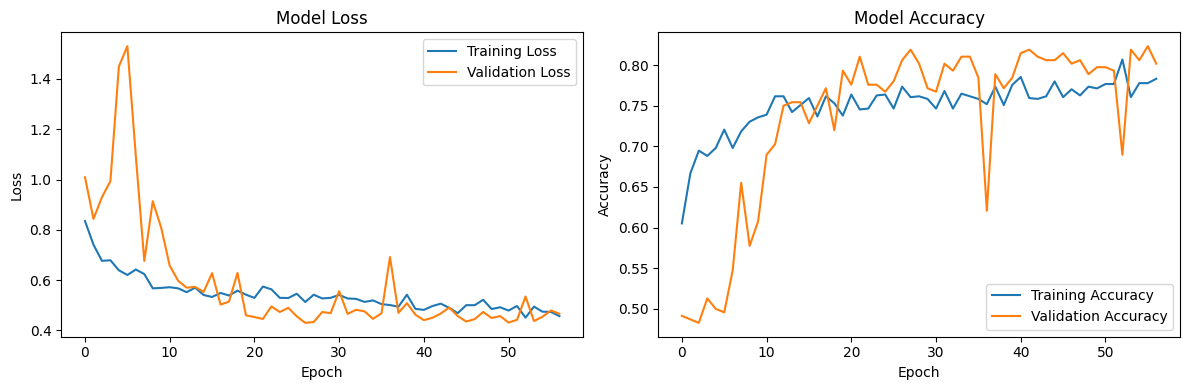


Test image files: ['01_test.tif', '02_test.tif', '03_test.tif', '04_test.tif', '05_test.tif']
Test mask files: ['01_test_mask.gif', '02_test_mask.gif', '03_test_mask.gif', '04_test_mask.gif', '05_test_mask.gif']
Test manual files: []


<Figure size 1200x2000 with 0 Axes>

No predictions generated. Exiting.


In [ ]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, jaccard_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from IPython.display import Image as IPyImage, display
import base64
from io import BytesIO

# Ensure matplotlib displays in notebook
%matplotlib inline

train_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images"
train_manual_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual"
train_mask_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/mask"
test_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/images"
test_manual_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/1st_manual"
test_mask_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/mask"

def check_directory(path):
    if os.path.exists(path):
        print(f"Contents of {path}: {os.listdir(path)}")
    else:
        print(f"Directory {path} does not exist!")
    return os.path.exists(path)

def load_image(file_path):
    try:
        img = Image.open(file_path)
        if img.mode == "RGB":
            img = np.array(img)
            green_channel = img[:, :, 1]
            return green_channel
        return np.array(img)
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

def preprocess_image(image):
    if image is None:
        return None
    image_float = image.astype(np.float32)
    mean = np.mean(image_float)
    std = np.std(image_float) if np.std(image_float) != 0 else 1
    gcn_image = (image_float - mean) / std
    gcn_image = np.clip(gcn_image, -3, 3)
    gcn_image = ((gcn_image + 3) / 6 * 255).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(gcn_image)
    gamma = 1.2
    gamma_image = np.array(255 * (clahe_image / 255.0) ** (1.0 / gamma), dtype=np.uint8)
    return gamma_image

def extract_patches(image, mask, manual=None, patch_size=64, max_patches=5000):
    if image is None or mask is None or (manual is not None and manual is None):
        print("Invalid input image, mask, or manual. Returning empty patches.")
        return np.array([]), np.array([]) if manual is not None else None, []
    patches = []
    labels = []
    coords = []
    height, width = image.shape
    step = patch_size // 4
    pad_size = patch_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_mask = np.pad(mask, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_manual = np.pad(manual, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant') if manual is not None else None

    indices = []
    for i in range(pad_size, height + pad_size, step):
        for j in range(pad_size, width + pad_size, step):
            if padded_mask[i, j] == 0:
                continue
            indices.append((i, j))

    if len(indices) > max_patches:
        indices = np.random.choice(len(indices), max_patches, replace=False)
        indices = [indices[i] for i in indices]

    for i, j in indices:
        patch = padded_image[i - pad_size:i + pad_size, j - pad_size:j + pad_size]
        if patch.shape != (patch_size, patch_size):
            continue
        if manual is not None:
            label = padded_manual[i, j] // 255
            labels.append(label)
        patches.append(patch)
        coords.append((i - pad_size, j - pad_size))

    patches = np.array(patches)
    labels = np.array(labels) if manual is not None else None
    if manual is not None:
        print(f"Extracted {len(patches)} patches: {np.sum(labels == 1) if labels is not None else 0} vessel, {np.sum(labels == 0) if labels is not None else 0} non-vessel")
    else:
        print(f"Extracted {len(patches)} patches for prediction")
    return patches, labels, coords

def level_i_balancing(patches, labels, rho=0.8):
    if labels is None or len(labels) == 0 or len(patches) == 0:
        print("Warning: No valid patches or labels for balancing. Returning empty.")
        return patches, labels
    patch_means = np.mean(patches, axis=(1, 2)) / 255.0
    vessel_patches = patches[labels == 1]
    non_vessel_patches = patches[labels == 0]
    non_vessel_means = patch_means[labels == 0]
    num_vessel = len(vessel_patches)
    if num_vessel == 0:
        print("Warning: No vessel patches found, returning all patches")
        return patches, labels
    threshold = np.percentile(non_vessel_means, 75) if len(non_vessel_means) > 0 else 0.5
    partial_background = non_vessel_patches[non_vessel_means >= threshold]
    full_background = non_vessel_patches[non_vessel_means < threshold]
    num_partial_to_select = int(num_vessel * rho)
    num_full_to_select = int(num_vessel * (1 - rho))
    selected_partial = partial_background[np.random.choice(len(partial_background), min(num_partial_to_select, len(partial_background)), replace=False)] if len(partial_background) > 0 else np.array([])
    selected_full = full_background[np.random.choice(len(full_background), min(num_full_to_select, len(full_background)), replace=False)] if len(full_background) > 0 else np.array([])
    balanced_patches = np.concatenate([vessel_patches, selected_partial, selected_full], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else vessel_patches
    balanced_labels = np.concatenate([np.ones(len(vessel_patches)), np.zeros(len(selected_partial) + len(selected_full))], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else np.ones(len(vessel_patches))
    print(f"Balanced dataset: {len(vessel_patches)} vessel, {len(selected_partial)} partial background, {len(selected_full)} full background")
    return balanced_patches, balanced_labels

def build_model(input_shape=(64, 64, 1)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D((2, 2)),
        Dropout(0.35),
        Flatten(),
        Dense(512),
        BatchNormalization(),
        ReLU(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def postprocess_mask(pred_mask, original_mask):
    kernel = np.ones((5, 5), np.uint8)
    closed_mask = cv2.morphologyEx(pred_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    opened_mask = cv2.morphologyEx(closed_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    return (opened_mask * (original_mask / 255)).astype(np.uint8)

def predict_mask(model, image, mask, patch_size=64, threshold=0.4):
    if image is None or mask is None:
        print("Invalid image or mask for prediction.")
        return np.zeros((584, 565), dtype=np.uint8)  # DRIVE image size
    preprocessed_image = preprocess_image(image)
    if preprocessed_image is None:
        print("Preprocessing failed.")
        return np.zeros((584, 565), dtype=np.uint8)
    preprocessed_image = preprocessed_image * (mask / 255)
    patches, _, coords = extract_patches(preprocessed_image, mask, manual=None, patch_size=patch_size)
    if len(patches) == 0:
        print("No patches extracted for prediction.")
        return np.zeros_like(image, dtype=np.uint8)
    patches = patches.reshape(-1, patch_size, patch_size, 1)
    pred_probabilities = model.predict(patches, verbose=0).flatten()
    pred_binary = (pred_probabilities > threshold).astype(np.uint8)
    height, width = image.shape
    pred_mask_accumulator = np.zeros((height, width), dtype=np.float32)
    patch_count_accumulator = np.zeros((height, width), dtype=np.float32)
    for idx, (top, left) in enumerate(coords):
        top_end = min(top + patch_size, height)
        left_end = min(left + patch_size, width)
        patch_height = top_end - top
        patch_width = left_end - left
        pred_mask_accumulator[top:top_end, left:left_end] += pred_binary[idx] * np.ones((patch_height, patch_width), dtype=np.float32)
        patch_count_accumulator[top:top_end, left:left_end] += 1
    epsilon = 1e-6
    pred_mask_averaged = np.where(patch_count_accumulator > 0, pred_mask_accumulator / (patch_count_accumulator + epsilon), 0)
    final_pred_mask = (pred_mask_averaged * 255).astype(np.uint8)
    final_pred_mask = final_pred_mask * (mask // 255)
    print(f"Processed {len(patches)} patches for prediction, Predicted mask: {np.sum(final_pred_mask > 0)} vessel pixels")
    return postprocess_mask(final_pred_mask, mask)

def evaluate_model(model, val_patches, val_labels):
    if val_patches is None or val_labels is None or len(val_patches) == 0:
        print("No validation data available for evaluation.")
        return None, None, None, None, None, None, None
    predictions = model.predict(val_patches, verbose=0).flatten()
    thresholds = np.linspace(0.3, 0.7, 9)
    best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou = 0, 0, 0, 0, 0, 0
    best_threshold = 0.5
    print("\n--- Evaluation Metrics per Threshold ---")
    for threshold in thresholds:
        pred_binary = (predictions > threshold).astype(np.uint8)
        acc = accuracy_score(val_labels, pred_binary)
        auc = roc_auc_score(val_labels, pred_binary)
        tn, fp, fn, tp = confusion_matrix(val_labels, pred_binary, labels=[0, 1]).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(val_labels, pred_binary)
        iou = jaccard_score(val_labels, pred_binary)
        print(f"Threshold {threshold:.2f}: Acc: {acc:.4f}, AUC: {auc:.4f}, Sens: {sensitivity:.4f}, Spec: {specificity:.4f}, F1: {f1:.4f}, IoU: {iou:.4f}")
        current_metric = (auc + f1) / 2
        if current_metric > (best_auc + best_f1) / 2:
            best_acc, best_auc, best_sensitivity, best_specificity = acc, auc, sensitivity, specificity
            best_f1, best_iou = f1, iou
            best_threshold = threshold
    print(f"\nOptimal Threshold: {best_threshold:.2f}")
    print(f"Prediction distribution at optimal threshold: {np.sum(predictions > best_threshold)} vessel, {np.sum(predictions <= best_threshold)} non-vessel")
    return best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou, best_threshold

def load_dataset(images_path, manual_path, mask_path, max_images=5):
    if not check_directory(manual_path):
        print("Manual path not found. Exiting.")
        return None, None
    all_patches = []
    all_labels = []
    image_files = sorted(glob.glob(os.path.join(images_path, "*.tif")))[:max_images]
    manual_files = sorted(glob.glob(os.path.join(manual_path, "*.gif")))[:max_images]
    mask_files = sorted(glob.glob(os.path.join(mask_path, "*.gif")))[:max_images]
    for idx, (img_file, manual_file, mask_file) in enumerate(zip(image_files, manual_files, mask_files)):
        print(f"Processing image {idx + 1}/{len(image_files)}: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if image is None or mask is None or manual is None:
            print(f"Skipping image {img_file} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping image {img_file} due to preprocessing error.")
            continue
        preprocessed_image = preprocessed_image * (mask / 255)
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual)
        if len(patches) == 0 or labels is None or len(labels) == 0:
            print(f"No valid patches extracted for image {img_file}. Skipping.")
            continue
        balanced_patches, balanced_labels = level_i_balancing(patches, labels)
        all_patches.append(balanced_patches)
        all_labels.append(balanced_labels)
    if not all_patches:
        print("No patches loaded from any image.")
        return np.array([]), np.array([])
    all_patches = np.concatenate(all_patches, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    all_patches = all_patches.reshape(-1, 64, 64, 1)
    print(f"Total dataset: {len(all_patches)} patches, {np.sum(all_labels == 1)} vessel, {np.sum(all_labels == 0)} non-vessel")
    return all_patches, all_labels

def main():
    print("Checking directories:")
    check_directory(train_images_path)
    check_directory(train_manual_path)
    check_directory(train_mask_path)
    check_directory(test_images_path)
    check_directory(test_manual_path)
    check_directory(test_mask_path)

    train_patches, train_labels = load_dataset(train_images_path, train_manual_path, train_mask_path)
    if train_patches is None or len(train_patches) == 0:
        print("Training data could not be loaded or is empty. Exiting.")
        return

    train_patches, val_patches, train_labels, val_labels = train_test_split(
        train_patches, train_labels, test_size=0.2, random_state=42, stratify=train_labels
    )

    class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
    print(f"Class weights: {class_weight_dict}")

    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    model = build_model()
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)

    history = model.fit(
        datagen.flow(train_patches, train_labels, batch_size=32),
        epochs=200,
        validation_data=(val_patches, val_labels),
        class_weight=class_weight_dict,
        callbacks=[reduce_lr, early_stopping],
        verbose=2
    )

    acc, auc, sensitivity, specificity, f1, iou, best_threshold = evaluate_model(model, val_patches, val_labels)
    if acc is not None:
        print(f"\nFinal Validation Metrics (Optimal Threshold: {best_threshold:.2f}):")
        print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, F1-Score: {f1:.4f}, IoU: {iou:.4f}")

    plt.figure(figsize=(12, 4), dpi=100)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.savefig('history_plots.png')
    plt.show()

    test_images = sorted(glob.glob(os.path.join(test_images_path, "*.tif")))[:5]
    test_masks = sorted(glob.glob(os.path.join(test_mask_path, "*.gif")))[:5]
    test_manuals = sorted(glob.glob(os.path.join(test_manual_path, "*.gif")))[:5]
    print("\nTest image files:", [os.path.basename(f) for f in test_images])
    print("Test mask files:", [os.path.basename(f) for f in test_masks])
    print("Test manual files:", [os.path.basename(f) for f in test_manuals])

    test_pred = []
    test_ground_truths = []
    plt.figure(figsize=(12, 20), dpi=100)
    for i, (img_file, mask_file, manual_file) in enumerate(zip(test_images, test_masks, test_manuals)):
        print(f"\nGenerating predicted mask for test image {i + 1}/5: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if image is None or mask is None or manual is None:
            print(f"Failed to load image/mask/manual for {os.path.basename(img_file)}. Skipping.")
            continue
        print(f"Ground truth vessel pixels for {os.path.basename(manual_file)}: {np.sum(manual > 0)}")
        pred_mask = predict_mask(model, image, mask, threshold=best_threshold)
        test_pred.append(pred_mask)
        test_ground_truths.append(manual)

        # Individual image visualization
        plt.figure(figsize=(15, 5), dpi=100)
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {i+1} (Green Channel)')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(manual, cmap='gray')
        plt.title(f'Ground Truth {i+1} ({np.sum(manual > 0)} pixels)')
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title(f'Predicted Mask {i+1} ({np.sum(pred_mask > 0)} pixels)')
        plt.axis('off')
        plt.tight_layout()
        individual_filename = f'test_image_{i+1}_results.png'
        plt.savefig(individual_filename)
        plt.show()
        print(f"Saved individual visualization: {individual_filename}")

        # Combined visualization (your provided code)
        plt.figure(figsize=(12, 20), dpi=100)
        plt.subplot(5, 3, i * 3 + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {i+1} (Green Channel)')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 2)
        plt.imshow(manual, cmap='gray')
        plt.title(f'Ground Truth {i+1} ({np.sum(manual > 0)} pixels)')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title(f'Predicted Mask {i+1} ({np.sum(pred_mask > 0)} pixels)')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('predictions.png')
    plt.show()

    if not test_pred:
        print("No predictions generated. Exiting.")
        return

    test_labels_list = []
    for img, mask, manual in zip(test_images, test_masks, test_manuals):
        img_basename = os.path.basename(img)
        image = load_image(img)
        mask = load_image(mask)
        manual = load_image(manual)
        if image is None or mask is None or manual is None:
            print(f"Skipping {img_basename} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping {img_basename} due to preprocessing error.")
            continue
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual)
        if labels is not None and len(labels) > 0:
            test_labels_list.append(labels)
        else:
            print(f"No valid labels extracted for {img_basename}. Skipping.")

    if not test_labels_list:
        print("No valid test labels extracted. Skipping evaluation.")
    else:
        test_patches_flat = np.concatenate([extract_patches(preprocess_image(load_image(img)), load_image(mask))[0] for img, mask in zip(test_images, test_masks)], axis=0)
        test_labels_flat = np.concatenate(test_labels_list, axis=0)
        test_pred_flat = model.predict(test_patches_flat.reshape(-1, 64, 64, 1), verbose=0)
        test_pred_flat = (test_pred_flat > best_threshold).astype(np.uint8).flatten()

        cm = confusion_matrix(test_labels_flat, test_pred_flat)
        plt.figure(figsize=(8, 6), dpi=100)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vessel', 'Vessel'], yticklabels=['Non-Vessel', 'Vessel'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig('confusion_matrix.png')
        plt.show()
        print(classification_report(test_labels_flat, test_pred_flat, target_names=['Non-Vessel', 'Vessel']))

    print("\nListing output directory contents:")
    print(os.listdir('/kaggle/working'))

    print("\nChecking predictions.png:")
    if os.path.exists('/kaggle/working/predictions.png'):
        file_size = os.path.getsize('/kaggle/working/predictions.png') / 1024  # KB
        print(f"predictions.png exists, size: {file_size:.2f} KB")
    else:
        print("predictions.png not found!")

    print("\nDisplaying predictions.png via IPyImage:")
    try:
        display(IPyImage(filename='/kaggle/working/predictions.png'))
    except Exception as e:
        print(f"Error displaying predictions.png via IPyImage: {e}")

    print("\nDisplaying predictions.png via base64:")
    try:
        with open('/kaggle/working/predictions.png', 'rb') as f:
            img_data = f.read()
        b64_string = base64.b64encode(img_data).decode('utf-8')
        display(IPyImage(data=base64.b64decode(b64_string)))
    except Exception as e:
        print(f"Error displaying predictions.png via base64: {e}")
        print("Please download /kaggle/working/predictions.png from Kaggle's output pane to view the images.")

    print("\nDisplaying individual visualizations:")
    for i in range(1, 6):
        individual_filename = f'test_image_{i}_results.png'
        if os.path.exists(individual_filename):
            print(f"Displaying {individual_filename}:")
            try:
                display(IPyImage(filename=individual_filename))
            except Exception as e:
                print(f"Error displaying {individual_filename} via IPyImage: {e}")
            try:
                with open(individual_filename, 'rb') as f:
                    img_data = f.read()
                b64_string = base64.b64encode(img_data).decode('utf-8')
                display(IPyImage(data=base64.b64decode(b64_string)))
            except Exception as e:
                print(f"Error displaying {individual_filename} via base64: {e}")
                print(f"Please download /kaggle/working/{individual_filename} from Kaggle's output pane.")
        else:
            print(f"{individual_filename} not found!")

    np.save('test_predictions.npy', test_pred)

if __name__ == "__main__":
    main()

Checking directories:
Contents of /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images: ['34_training.tif', '40_training.tif', '22_training.tif', '27_training.tif', '28_training.tif', '26_training.tif', '38_training.tif', '39_training.tif', '24_training.tif', '33_training.tif', '36_training.tif', '32_training.tif', '25_training.tif', '37_training.tif', '29_training.tif', '23_training.tif', '30_training.tif', '35_training.tif', '31_training.tif', '21_training.tif']
Contents of /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual: ['23_manual1.gif', '38_manual1.gif', '35_manual1.gif', '30_manual1.gif', '34_manual1.gif', '27_manual1.gif', '29_manual1.gif', '22_manual1.gif', '25_manual1.gif', '33_manual1.gif', '39_manual1.gif', '36_manual1.gif', '21_manual1.gif', '37_manual1.gif', '24_manual1.gif', '32_manual1.gif', '31_manual1.gif', '40_manual1.gif', '26_manual1.gif', '28_manual1.gif']
Contents of /kaggle/input/drive-

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 - 37s - 334ms/step - accuracy: 0.9426 - loss: 0.3327 - val_accuracy: 0.9630 - val_loss: 0.6232 - learning_rate: 2.0000e-04
Epoch 2/200
112/112 - 5s - 44ms/step - accuracy: 0.9920 - loss: 0.1799 - val_accuracy: 0.9805 - val_loss: 0.2872 - learning_rate: 2.0000e-04
Epoch 3/200
112/112 - 5s - 41ms/step - accuracy: 0.9925 - loss: 0.1400 - val_accuracy: 0.9955 - val_loss: 0.1511 - learning_rate: 2.0000e-04
Epoch 4/200
112/112 - 5s - 48ms/step - accuracy: 0.9927 - loss: 0.1148 - val_accuracy: 0.9953 - val_loss: 0.1119 - learning_rate: 2.0000e-04
Epoch 5/200
112/112 - 5s - 44ms/step - accuracy: 0.9928 - loss: 0.0973 - val_accuracy: 0.9954 - val_loss: 0.0920 - learning_rate: 2.0000e-04
Epoch 6/200
112/112 - 5s - 45ms/step - accuracy: 0.9929 - loss: 0.0849 - val_accuracy: 0.9955 - val_loss: 0.0768 - learning_rate: 2.0000e-04
Epoch 7/200
112/112 - 5s - 44ms/step - accuracy: 0.9929 - loss: 0.0755 - val_accuracy: 0.9951 - val_loss: 0.0649 - learning_rate: 2.0000e-04
Epoch 8/200
112/112 - 5


--- Evaluation Metrics per Threshold ---
Threshold 0.30: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9978, IoU: 0.9955
Threshold 0.35: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9978, IoU: 0.9955
Threshold 0.40: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9978, IoU: 0.9955
Threshold 0.45: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9978, IoU: 0.9955
Threshold 0.50: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9978, IoU: 0.9955
Threshold 0.55: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9978, IoU: 0.9955
Threshold 0.60: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9978, IoU: 0.9955
Threshold 0.65: Acc: 0.9955, AUC: 0.5000, Sens: 1.0000, Spec: 0.0000, F1: 0.9977, IoU: 0.9955
Threshold 0.70: Acc: 0.9952, AUC: 0.4999, Sens: 0.9997, Spec: 0.0000, F1: 0.9976, IoU: 0.9952

Optimal Threshold: 0.30
Prediction distribution at optimal threshold: 3649536 vessel, 0 non-vessel

Final Valid

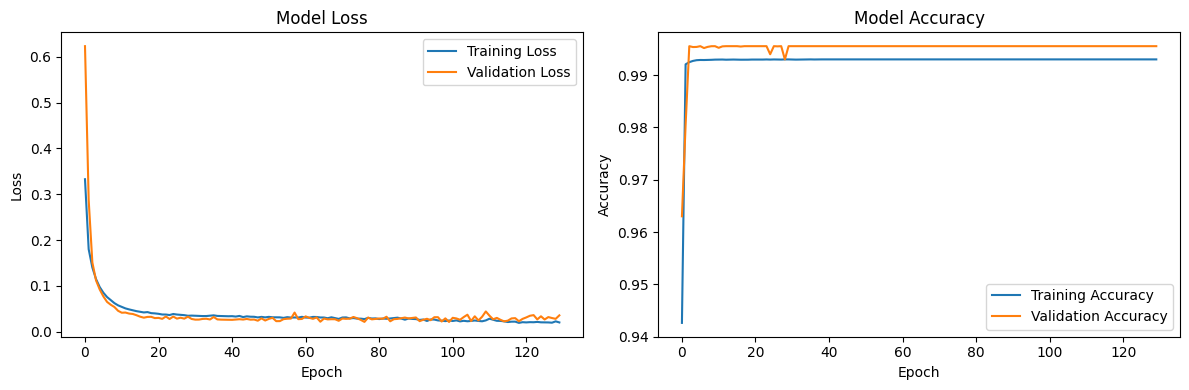

Directory /kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/1st_manual does not exist!
Test manual annotations not found. Skipping test evaluation and visualization.


In [ ]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, jaccard_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from IPython.display import Image as IPyImage, display
import base64
from io import BytesIO

%matplotlib inline

train_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images"
train_manual_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual"
train_mask_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/mask"
test_images_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/images"
test_manual_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/1st_manual"
test_mask_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/test/mask"

def check_directory(path):
    if os.path.exists(path):
        print(f"Contents of {path}: {os.listdir(path)}")
    else:
        print(f"Directory {path} does not exist!")
    return os.path.exists(path)

def load_image(file_path):
    try:
        img = Image.open(file_path)
        if img.mode == "RGB":
            img = np.array(img)
            green_channel = img[:, :, 1]
            return green_channel
        return np.array(img)
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

def preprocess_image(image):
    if image is None:
        return None
    image_float = image.astype(np.float32)
    mean = np.mean(image_float)
    std = np.std(image_float) if np.std(image_float) != 0 else 1
    gcn_image = (image_float - mean) / std
    gcn_image = np.clip(gcn_image, -3, 3)
    gcn_image = ((gcn_image + 3) / 6 * 255).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(gcn_image)
    gamma = 1.2
    gamma_image = np.array(255 * (clahe_image / 255.0) ** (1.0 / gamma), dtype=np.uint8)
    return gamma_image

def extract_patches(image, mask, manual=None, patch_size=64, max_patches=5000):
    if image is None or mask is None or (manual is not None and manual is None):
        print("Invalid input image, mask, or manual. Returning empty patches.")
        return np.array([]), np.array([]) if manual is not None else None, []
    patches = []
    labels = []
    coords = []
    height, width = image.shape
    step = patch_size // 4
    pad_size = patch_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_mask = np.pad(mask, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    padded_manual = np.pad(manual, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant') if manual is not None else None

    indices = []
    for i in range(pad_size, height + pad_size, step):
        for j in range(pad_size, width + pad_size, step):
            if padded_mask[i, j] == 0:
                continue
            indices.append((i, j))

    if len(indices) > max_patches:
        indices = np.random.choice(len(indices), max_patches, replace=False)
        indices = [indices[i] for i in indices]

    for i, j in indices:
        patch = padded_image[i - pad_size:i + pad_size, j - pad_size:j + pad_size]
        if patch.shape != (patch_size, patch_size):
            continue
        if manual is not None:
            label_patch = padded_manual[i - pad_size:i + pad_size, j - pad_size:j + pad_size]
            if label_patch.shape != (patch_size, patch_size):
                continue
            labels.append(label_patch // 255)
        patches.append(patch)
        coords.append((i - pad_size, j - pad_size))

    patches = np.array(patches)
    labels = np.array(labels) if manual is not None else None
    if manual is not None:
        print(f"Extracted {len(patches)} patches: {np.sum(labels == 1) if labels is not None else 0} vessel pixels")
    else:
        print(f"Extracted {len(patches)} patches for prediction")
    return patches, labels, coords

def level_i_balancing(patches, labels, patch_size=64, rho=0.8):
    if labels is None or len(labels) == 0 or len(patches) == 0:
        print("Warning: No valid patches or labels for balancing. Returning empty.")
        return patches, labels
    patch_means = np.mean(patches, axis=(1, 2)) / 255.0
    vessel_patches = patches[np.any(labels == 1, axis=(1, 2))]
    non_vessel_patches = patches[np.all(labels == 0, axis=(1, 2))]
    non_vessel_means = patch_means[np.all(labels == 0, axis=(1, 2))]
    num_vessel = len(vessel_patches)
    if num_vessel == 0:
        print("Warning: No vessel patches found, returning all patches")
        return patches, labels
    threshold = np.percentile(non_vessel_means, 75) if len(non_vessel_means) > 0 else 0.5
    partial_background = non_vessel_patches[non_vessel_means >= threshold]
    full_background = non_vessel_patches[non_vessel_means < threshold]
    num_partial_to_select = int(num_vessel * rho)
    num_full_to_select = int(num_vessel * (1 - rho))
    selected_partial = partial_background[np.random.choice(len(partial_background), min(num_partial_to_select, len(partial_background)), replace=False)] if len(partial_background) > 0 else np.array([])
    selected_full = full_background[np.random.choice(len(full_background), min(num_full_to_select, len(full_background)), replace=False)] if len(full_background) > 0 else np.array([])
    balanced_patches = np.concatenate([vessel_patches, selected_partial, selected_full], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else vessel_patches
    balanced_labels = np.concatenate([np.ones((len(vessel_patches), patch_size, patch_size), dtype=np.uint8),
                                     np.zeros((len(selected_partial) + len(selected_full), patch_size, patch_size), dtype=np.uint8)], axis=0) if len(selected_partial) > 0 and len(selected_full) > 0 else np.ones((len(vessel_patches), patch_size, patch_size), dtype=np.uint8)
    print(f"Balanced dataset: {len(vessel_patches)} vessel patches, {len(selected_partial)} partial background, {len(selected_full)} full background")
    return balanced_patches, balanced_labels

def build_unet(input_shape=(64, 64, 1)):
    inputs = Input(input_shape)

    c1 = Conv2D(32, (3, 3), padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    c1 = ReLU()(c1)
    c1 = Conv2D(32, (3, 3), padding='same')(c1)
    c1 = BatchNormalization()(c1)
    c1 = ReLU()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = ReLU()(c2)
    c2 = Conv2D(64, (3, 3), padding='same')(c2)
    c2 = BatchNormalization()(c2)
    c2 = ReLU()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = ReLU()(c3)
    c3 = Conv2D(128, (3, 3), padding='same')(c3)
    c3 = BatchNormalization()(c3)
    c3 = ReLU()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(256, (3, 3), padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = ReLU()(c4)
    c4 = Conv2D(256, (3, 3), padding='same')(c4)
    c4 = BatchNormalization()(c4)
    c4 = ReLU()(c4)

    u5 = UpSampling2D((2, 2))(c4)
    u5 = Concatenate()([u5, c3])
    c5 = Conv2D(128, (3, 3), padding='same')(u5)
    c5 = BatchNormalization()(c5)
    c5 = ReLU()(c5)
    c5 = Conv2D(128, (3, 3), padding='same')(c5)
    c5 = BatchNormalization()(c5)
    c5 = ReLU()(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = Concatenate()([u6, c2])
    c6 = Conv2D(64, (3, 3), padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = ReLU()(c6)
    c6 = Conv2D(64, (3, 3), padding='same')(c6)
    c6 = BatchNormalization()(c6)
    c6 = ReLU()(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = Concatenate()([u7, c1])
    c7 = Conv2D(32, (3, 3), padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = ReLU()(c7)
    c7 = Conv2D(32, (3, 3), padding='same')(c7)
    c7 = BatchNormalization()(c7)
    c7 = ReLU()(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def postprocess_mask(pred_mask, original_mask):
    kernel = np.ones((5, 5), np.uint8)
    closed_mask = cv2.morphologyEx(pred_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    opened_mask = cv2.morphologyEx(closed_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    return (opened_mask * (original_mask / 255)).astype(np.uint8)

def predict_mask(model, image, mask, patch_size=64, threshold=0.4):
    if image is None or mask is None:
        print("Invalid image or mask for prediction.")
        return np.zeros((584, 565), dtype=np.uint8)
    preprocessed_image = preprocess_image(image)
    if preprocessed_image is None:
        print("Preprocessing failed.")
        return np.zeros((584, 565), dtype=np.uint8)
    preprocessed_image = preprocessed_image * (mask / 255)
    patches, _, coords = extract_patches(preprocessed_image, mask, manual=None, patch_size=patch_size)
    if len(patches) == 0:
        print("No patches extracted for prediction.")
        return np.zeros_like(image, dtype=np.uint8)
    patches = patches.reshape(-1, patch_size, patch_size, 1)
    pred_patches = model.predict(patches, verbose=0)
    pred_patches = (pred_patches > threshold).astype(np.uint8)
    height, width = image.shape
    pred_mask_accumulator = np.zeros((height, width), dtype=np.float32)
    patch_count_accumulator = np.zeros((height, width), dtype=np.float32)
    for idx, (top, left) in enumerate(coords):
        top_end = min(top + patch_size, height)
        left_end = min(left + patch_size, width)
        patch_height = top_end - top
        patch_width = left_end - left
        pred_mask_accumulator[top:top_end, left:left_end] += pred_patches[idx, :patch_height, :patch_width, 0]
        patch_count_accumulator[top:top_end, left:left_end] += 1
    epsilon = 1e-6
    pred_mask_averaged = np.where(patch_count_accumulator > 0, pred_mask_accumulator / (patch_count_accumulator + epsilon), 0)
    final_pred_mask = (pred_mask_averaged * 255).astype(np.uint8)
    final_pred_mask = final_pred_mask * (mask // 255)
    print(f"Processed {len(patches)} patches for prediction, Predicted mask: {np.sum(final_pred_mask > 0)} vessel pixels")
    return postprocess_mask(final_pred_mask, mask)

def evaluate_model(model, val_patches, val_labels):
    if val_patches is None or val_labels is None or len(val_patches) == 0:
        print("No validation data available for evaluation.")
        return None, None, None, None, None, None, None
    predictions = model.predict(val_patches, verbose=0)
    predictions = predictions.reshape(-1)
    val_labels = val_labels.reshape(-1)
    thresholds = np.linspace(0.3, 0.7, 9)
    best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou = 0, 0, 0, 0, 0, 0
    best_threshold = 0.5
    print("\n--- Evaluation Metrics per Threshold ---")
    for threshold in thresholds:
        pred_binary = (predictions > threshold).astype(np.uint8)
        acc = accuracy_score(val_labels, pred_binary)
        auc = roc_auc_score(val_labels, pred_binary)
        tn, fp, fn, tp = confusion_matrix(val_labels, pred_binary, labels=[0, 1]).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(val_labels, pred_binary)
        iou = jaccard_score(val_labels, pred_binary)
        print(f"Threshold {threshold:.2f}: Acc: {acc:.4f}, AUC: {auc:.4f}, Sens: {sensitivity:.4f}, Spec: {specificity:.4f}, F1: {f1:.4f}, IoU: {iou:.4f}")
        current_metric = (auc + f1) / 2
        if current_metric > (best_auc + best_f1) / 2:
            best_acc, best_auc, best_sensitivity, best_specificity = acc, auc, sensitivity, specificity
            best_f1, best_iou = f1, iou
            best_threshold = threshold
    print(f"\nOptimal Threshold: {best_threshold:.2f}")
    print(f"Prediction distribution at optimal threshold: {np.sum(predictions > best_threshold)} vessel, {np.sum(predictions <= best_threshold)} non-vessel")
    return best_acc, best_auc, best_sensitivity, best_specificity, best_f1, best_iou, best_threshold

def load_dataset(images_path, manual_path, mask_path, max_images=5, patch_size=64):
    if not check_directory(manual_path):
        print("Manual path not found. Exiting.")
        return None, None
    all_patches = []
    all_labels = []
    image_files = sorted(glob.glob(os.path.join(images_path, "*.tif")))[:max_images]
    manual_files = sorted(glob.glob(os.path.join(manual_path, "*.gif")))[:max_images]
    mask_files = sorted(glob.glob(os.path.join(mask_path, "*.gif")))[:max_images]
    for idx, (img_file, manual_file, mask_file) in enumerate(zip(image_files, manual_files, mask_files)):
        print(f"Processing image {idx + 1}/{len(image_files)}: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if image is None or mask is None or manual is None:
            print(f"Skipping image {img_file} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping image {img_file} due to preprocessing error.")
            continue
        preprocessed_image = preprocessed_image * (mask / 255)
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual, patch_size=patch_size)
        if len(patches) == 0 or labels is None or len(labels) == 0:
            print(f"No valid patches extracted for image {img_file}. Skipping.")
            continue
        balanced_patches, balanced_labels = level_i_balancing(patches, labels, patch_size=patch_size)
        all_patches.append(balanced_patches)
        all_labels.append(balanced_labels)
    if not all_patches:
        print("No patches loaded from any image.")
        return np.array([]), np.array([])
    all_patches = np.concatenate(all_patches, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    all_patches = all_patches.reshape(-1, patch_size, patch_size, 1)
    all_labels = all_labels.reshape(-1, patch_size, patch_size, 1)
    print(f"Total dataset: {len(all_patches)} patches, {np.sum(all_labels == 1)} vessel pixels")
    return all_patches, all_labels

def main():
    print("Checking directories:")
    check_directory(train_images_path)
    check_directory(train_manual_path)
    check_directory(train_mask_path)
    check_directory(test_images_path)
    check_directory(test_manual_path)
    check_directory(test_mask_path)

    train_patches, train_labels = load_dataset(train_images_path, train_manual_path, train_mask_path)
    if train_patches is None or len(train_patches) == 0:
        print("Training data could not be loaded or is empty. Exiting.")
        return

    train_patches, val_patches, train_labels, val_labels = train_test_split(
        train_patches, train_labels, test_size=0.2, random_state=42
    )

    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    model = build_unet()
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)

    history = model.fit(
        datagen.flow(train_patches, train_labels, batch_size=32),
        epochs=200,
        validation_data=(val_patches, val_labels),
        callbacks=[reduce_lr, early_stopping],
        verbose=2
    )

    acc, auc, sensitivity, specificity, f1, iou, best_threshold = evaluate_model(model, val_patches, val_labels)
    if acc is not None:
        print(f"\nFinal Validation Metrics (Optimal Threshold: {best_threshold:.2f}):")
        print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, F1-Score: {f1:.4f}, IoU: {iou:.4f}")

    plt.figure(figsize=(12, 4), dpi=100)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.savefig('history_plots.png')
    plt.show()

    if not check_directory(test_manual_path):
        print("Test manual annotations not found. Skipping test evaluation and visualization.")
        return

    test_images = sorted(glob.glob(os.path.join(test_images_path, "*.tif")))[:5]
    test_masks = sorted(glob.glob(os.path.join(test_mask_path, "*.gif")))[:5]
    test_manuals = sorted(glob.glob(os.path.join(test_manual_path, "*.gif")))[:5]
    print("\nTest image files:", [os.path.basename(f) for f in test_images])
    print("Test mask files:", [os.path.basename(f) for f in test_masks])
    print("Test manual files:", [os.path.basename(f) for f in test_manuals])

    test_pred = []
    test_ground_truths = []
    plt.figure(figsize=(12, 20), dpi=100)
    for i, (img_file, mask_file, manual_file) in enumerate(zip(test_images, test_masks, test_manuals)):
        print(f"\nGenerating predicted mask for test image {i + 1}/5: {os.path.basename(img_file)}")
        image = load_image(img_file)
        mask = load_image(mask_file)
        manual = load_image(manual_file)
        if image is None or mask is None or manual is None:
            print(f"Failed to load image/mask/manual for {os.path.basename(img_file)}. Skipping.")
            continue
        print(f"Ground truth vessel pixels for {os.path.basename(manual_file)}: {np.sum(manual > 0)}")
        pred_mask = predict_mask(model, image, mask, threshold=best_threshold)
        test_pred.append(pred_mask)
        test_ground_truths.append(manual)

        plt.figure(figsize=(15, 5), dpi=100)
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {i+1} (Green Channel)')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(manual, cmap='gray')
        plt.title(f'Ground Truth {i+1} ({np.sum(manual > 0)} pixels)')
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title(f'Predicted Mask {i+1} ({np.sum(pred_mask > 0)} pixels)')
        plt.axis('off')
        plt.tight_layout()
        individual_filename = f'test_image_{i+1}_results.png'
        plt.savefig(individual_filename)
        plt.show()
        print(f"Saved individual visualization: {individual_filename}")

        plt.figure(figsize=(12, 20), dpi=100)
        plt.subplot(5, 3, i * 3 + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {i+1} (Green Channel)')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 2)
        plt.imshow(manual, cmap='gray')
        plt.title(f'Ground Truth {i+1} ({np.sum(manual > 0)} pixels)')
        plt.axis('off')
        plt.subplot(5, 3, i * 3 + 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title(f'Predicted Mask {i+1} ({np.sum(pred_mask > 0)} pixels)')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('predictions.png')
    plt.show()

    if not test_pred:
        print("No predictions generated. Exiting.")
        return

    test_labels_list = []
    for img, mask, manual in zip(test_images, test_masks, test_manuals):
        img_basename = os.path.basename(img)
        image = load_image(img)
        mask = load_image(mask)
        manual = load_image(manual)
        if image is None or mask is None or manual is None:
            print(f"Skipping {img_basename} due to loading error.")
            continue
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is None:
            print(f"Skipping {img_basename} due to preprocessing error.")
            continue
        patches, labels, _ = extract_patches(preprocessed_image, mask, manual)
        if labels is not None and len(labels) > 0:
            test_labels_list.append(labels)
        else:
            print(f"No valid labels extracted for {img_basename}. Skipping.")

    if not test_labels_list:
        print("No valid test labels extracted. Skipping evaluation.")
    else:
        test_patches_flat = np.concatenate([extract_patches(preprocess_image(load_image(img)), load_image(mask))[0] for img, mask in zip(test_images, test_masks)], axis=0)
        test_labels_flat = np.concatenate(test_labels_list, axis=0).reshape(-1)
        test_pred_flat = model.predict(test_patches_flat.reshape(-1, 64, 64, 1), verbose=0)
        test_pred_flat = (test_pred_flat > best_threshold).astype(np.uint8).flatten()

        cm = confusion_matrix(test_labels_flat, test_pred_flat)
        plt.figure(figsize=(8, 6), dpi=100)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vessel', 'Vessel'], yticklabels=['Non-Vessel', 'Vessel'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig('confusion_matrix.png')
        plt.show()
        print(classification_report(test_labels_flat, test_pred_flat, target_names=['Non-Vessel', 'Vessel']))

    print("\nListing output directory contents:")
    print(os.listdir('/kaggle/working'))

    print("\nChecking predictions.png:")
    if os.path.exists('/kaggle/working/predictions.png'):
        file_size = os.path.getsize('/kaggle/working/predictions.png') / 1024
        print(f"predictions.png exists, size: {file_size:.2f} KB")
    else:
        print("predictions.png not found!")

    print("\nDisplaying predictions.png via IPyImage:")
    try:
        display(IPyImage(filename='/kaggle/working/predictions.png'))
    except Exception as e:
        print(f"Error displaying predictions.png via IPyImage: {e}")

    print("\nDisplaying predictions.png via base64:")
    try:
        with open('/kaggle/working/predictions.png', 'rb') as f:
            img_data = f.read()
        b64_string = base64.b64encode(img_data).decode('utf-8')
        display(IPyImage(data=base64.b64decode(b64_string)))
    except Exception as e:
        print(f"Error displaying predictions.png via base64: {e}")
        print("Please download /kaggle/working/predictions.png from Kaggle's output pane to view the images.")

    print("\nDisplaying individual visualizations:")
    for i in range(1, 6):
        individual_filename = f'test_image_{i}_results.png'
        if os.path.exists(individual_filename):
            print(f"Displaying {individual_filename}:")
            try:
                display(IPyImage(filename=individual_filename))
            except Exception as e:
                print(f"Error displaying {individual_filename} via IPyImage: {e}")
            try:
                with open(individual_filename, 'rb') as f:
                    img_data = f.read()
                b64_string = base64.b64encode(img_data).decode('utf-8')
                display(IPyImage(data=base64.b64decode(b64_string)))
            except Exception as e:
                print(f"Error displaying {individual_filename} via base64: {e}")
                print(f"Please download /kaggle/working/{individual_filename} from Kaggle's output pane.")
        else:
            print(f"{individual_filename} not found!")

    np.save('test_predictions.npy', test_pred)

if __name__ == "__main__":
    main()